In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph() 

In [5]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.0000003

In [6]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [7]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [8]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [16]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

# w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w1 = tf.Variable(np.load('./save/weights/w1.npy'))
w1_ = tie_weight(w1)

w2 = tf.Variable(np.load('./save/weights/w2.npy'))
w2_ = tie_weight(w2)

w3 = tf.Variable(np.load('./save/weights/w3.npy'))
w3_ = tie_weight(w3)

w4 = tf.Variable(np.load('./save/weights/w4.npy'))
w4_ = tie_weight(w4)

w5 = tf.Variable(np.load('./save/weights/w5.npy'))
w5_ = tie_weight(w5)

w6 = tf.Variable(np.load('./save/weights/w6.npy'))
w6_ = tie_weight(w6)

w7 = tf.Variable(np.load('./save/weights/w7.npy'))
w7_ = tie_weight(w7)

w8 = tf.Variable(np.load('./save/weights/w8.npy'))
w8_ = tie_weight(w8)

w9 = tf.Variable(np.load('./save/weights/w9.npy'))
w9_ = tie_weight(w9)

w10 = tf.Variable(np.load('./save/weights/w10.npy'))
w10_ = tie_weight(w10)

In [10]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
act_func = lambda X:X #tf.nn.relu

In [11]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
hid_layer2 = act_func(tf.matmul(hid_layer1, w2))
hid_layer3 = act_func(tf.matmul(hid_layer2, w3))
hid_layer4 = act_func(tf.matmul(hid_layer3, w4))
hid_layer5 = act_func(tf.matmul(hid_layer4, w5))
hid_layer6 = act_func(tf.matmul(hid_layer5, w6))
hid_layer7 = act_func(tf.matmul(hid_layer6, w7))
hid_layer8 = act_func(tf.matmul(hid_layer7, w8))
hid_layer9 = act_func(tf.matmul(hid_layer8, w9))


hid_layer10 = act_func(tf.matmul(hid_layer9, w10))

hid_layer9_ = act_func(tf.matmul(hid_layer10, w10_))


hid_layer8_ = act_func(tf.matmul(hid_layer9_, w9_))
hid_layer7_ = act_func(tf.matmul(hid_layer8_, w8_))
hid_layer6_ = act_func(tf.matmul(hid_layer7_, w7_))
hid_layer5_ = act_func(tf.matmul(hid_layer6_, w6_))
hid_layer4_ = act_func(tf.matmul(hid_layer5_, w5_))
hid_layer3_ = act_func(tf.matmul(hid_layer4_, w4_))
hid_layer2_ = act_func(tf.matmul(hid_layer3_, w3_))
hid_layer1_ = act_func(tf.matmul(hid_layer2_,w2_))

output_layer = tf.matmul(hid_layer1_, w1_)

In [12]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [13]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w10])

In [14]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [83]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})

            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/ae_10_1.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.09228046983480453
Epoch 1 Complete. Training Loss: 0.09518757462501526
Epoch 2 Complete. Training Loss: 0.09298020601272583
Epoch 3 Complete. Training Loss: 0.0921514630317688
Epoch 4 Complete. Training Loss: 0.09539223462343216
Epoch 5 Complete. Training Loss: 0.0926726758480072
Epoch 6 Complete. Training Loss: 0.09686631709337234
Epoch 7 Complete. Training Loss: 0.09061040729284286
Keyboard Interrupted
Finished Training the Model


In [17]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_10_1.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight10 = w10.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_10_1.ckpt


NotFoundError: Key Variable_9/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\asyncio\base_events.py", line 1424, in _run_once
    handle._run()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\asyncio\events.py", line 126, in _run
    self._callback(*self._args)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-d3e0583c8937>", line 3, in <module>
    saver = tf.train.Saver()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 1338, in __init__
    self.build()
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 1347, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 1384, in _build
    build_save=build_save, build_restore=build_restore)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 835, in _build_internal
    restore_sequentially, reshape)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 472, in _AddRestoreOps
    restore_sequentially)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\training\saver.py", line 886, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1546, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key Variable_9/Adam not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


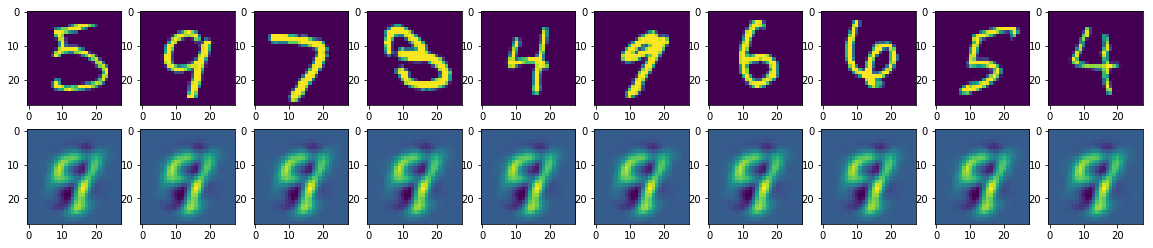

In [85]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [86]:
print(weight10.shape)
np.save('./save/weights/w10.npy',weight10)
#wt1 = np.load('./save/weights/w1.npy')

(2, 1)
